# Introduction into Data Science - Assignment Part II

This is the second part of the assignment in IDS 2023/2024.

This part of the assignment consists of five questions — each of these questions is contained in a separate Jupyter notebook:
- [Question 1: Data Preprocessing](Q1_Preprocessing_Visualization.ipynb)
- [Question 2: Association Rules](Q2_Frequent_Itemsets_Association_Rules.ipynb)
- [Question 3: Process Mining](Q3_Process_Mining.ipynb)
- [Question 4: Text Mining](Q4_Text_Mining.ipynb)
- [Question 5: Big Data](Q5_Big_Data.ipynb)

Additional required files are in two folders.
- [datasets](datasets/)
- [scripts](scripts/)

Please use the provided notebook to work on the questions. When you are done, upload your version of each of the notebooks to Moodle. Your submission will, therefore, consist of five jupyter notebook and _no_ additional file. Any additionally provided files will not be considered in grading.
Enter your commented Python code and answers in the corresponding cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. Please **DO NOT CLEAR THE OUTPUT** of the notebook you are submitting! Additionally, please ensure that the code in the notebook runs if placed in the same folder as all of the provided files, delivering the same outputs as the ones you submit in the notebook. This includes being runnable in the bundled conda environment.

*Please make sure to include the names and matriculation numbers of all group members in the provided slots in each of the notebooks.* If a name or a student id is missing, the student will not receive any points.

Hint 1: **Plan your time wisely.** A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 2: RWTHMoodle allows multiple submissions, with every new submission overwriting the previous one. **Partial submissions are possible and encouraged.** This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

Hint 3: As a technical note. Some IDEs such as DataSpell may automatically strip jupyter notebook cell metadata. If you are able, please re-add it from the source notebooks before submission. This is necessary for our grading.

Enter your group number and members with matriculation numbers below.

In [1]:
GROUP_NO = 123 # group number
GROUP_MEMBERS = {
    123456: "firstname lastname", # mat. no. : name,
    234567: "firstname lastname",
    345678: "firstname lastname",
}

---

In [2]:
# required imports
# do not edit!

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Question 1: Preprocessing and Visualization (19 Points)

**About the Data: Heart Disease**

In this task, our data (`q1_heart_disease.csv`) contains records related to the diagnosis of heart disease in patients. It includes various clinical and non-clinical attributes used to determine the presence or absence of heart disease. Columns cover aspects like patient demographics, vital signs, symptoms, and potential risk factors associated with heart conditions. See below a short description for each column.

| Column         | Description                                                                                                                       |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| Age            | The age of the patient in years.                                                                                                  |
| Sex            | The sex of the patient.                                                                                                           |
| ChestPainType  | The type of chest pain (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomnic).                       |
| RestingBP      | The resting blood pressure in millimeter of mercury [mmHg].                                                                       |
| Cholesterol    | The cholesterol of the blood serum in milligrams per deciliter (mg/dl).                                                           |
| FastingBS      | 1 if the blood sugar while fasting is above 120 mg/dl, 0 otherwise.                                                               |
| RestingECG     | Results of the electrocardiogram when resting.                                                                                    |
| MaxHR          | The maximum heart rate achieved while exercising.                                                                                 |
| ExerciseAngina | If an Angina (pressure on chest) is inducible by exercising.                                                                      |
| Oldpeak        | Numerical measure of the depression of the ST segment of electrocardiogram induced by exercise relative to rest.                  |
| ST_Slope       | The slope of the peak exercise ST segment, where 0 corresponds to downsloping; 1 to a flat level, and 2 corresponds to upsloping. |
| HeartDisease   | Heart disease being present or not.                                                                                               |

## Part I: Preprocessing (11 pts)

### a)
First things first. Import the file **q1_heart_disease.csv** and save it into a dataframe named `heart_df`. Visualize the dataframe by showing the first five lines. 


In [3]:
# Import and visualization.
datapath = "datasets/q1_heart_disease.csv"
heart_df = pd.read_csv(datapath)
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


### b) 
i. Check the data types. Are there any data type problems (e.g., numerical columns having a non-numerical data type)?

In [4]:
# Visualizing data types
heart_df.dtypes

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object

In [5]:
# Check if numerical columns have non-numerical entries
for column in heart_df.select_dtypes(include=['float64']).columns:
    try:
        pd.to_numeric(heart_df[column])
    except pd.errors.PandasError:
        print(f"Column {column} has non-numerical data.")

ii. Fix problems, if there are any data type problems. Further, improve categorical columns by setting them to the categorical type and translate boolean columns to boolean values.

In [6]:
# Fixing problems, if necessary
# Originally, We removed NaN values and fixed simmilar issues in this cell, however the tasks require us to fix them at a later stage (subtask c)).
# So we do not really know wha to do here  

In [7]:
# Set categorical columns to categorial type.
# Categorical columns are: 
categorical_columns =  ["Sex", "ChestPainType","RestingECG", "ST_Slope"]
heart_df[categorical_columns] = heart_df[categorical_columns].astype('category')

In [8]:
# Translate boolean columns to boolean type
# Boolean columns are: 
boolean_columns = ["FastingBS",  "ExerciseAngina", "HeartDisease"]
for column in boolean_columns:
    try:
        heart_df[column] = heart_df[column].astype('boolean')
    except TypeError:
        print(column)

ExerciseAngina


In [9]:
#Handle 'Y' and 'N' in ExerciseAngina column seperatly by mapping them to 1 and 0
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].map({'Y': 1, 'N': 0})
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].astype('boolean')

In [10]:
# Checking again by visualizing data types
heart_df.dtypes

Age                float64
Sex               category
ChestPainType     category
RestingBP          float64
Cholesterol        float64
FastingBS          boolean
RestingECG        category
MaxHR              float64
ExerciseAngina     boolean
Oldpeak            float64
ST_Slope          category
HeartDisease       boolean
dtype: object

### c)
i. In this subtask, we start with a first evaluation of our data by checking the plausibility of some entries. To make sure that we do not have a clash between intended NaN values and existing NaN values in the dataset, we first remove all NaN values. Report the number of rows containing a NaN value.

In [11]:
# Check and print the rows containing NaN values
print(f"Number of Rows containing NaN values: {heart_df[heart_df.isna().any(axis=1)].shape[0]}")
# Remove NaN values
heart_df = heart_df.dropna()

Number of Rows containing NaN values: 2


ii. To check plausibility, create boxplots for all numerical features. Reason which features have invalid or missing values. Show and report such outliers. 

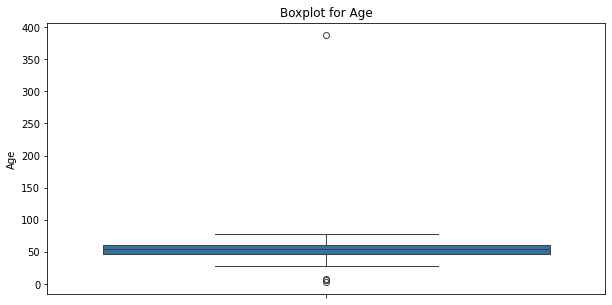

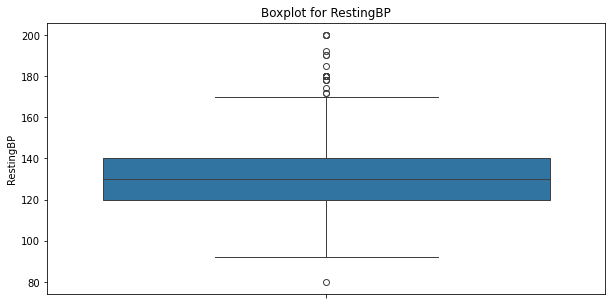

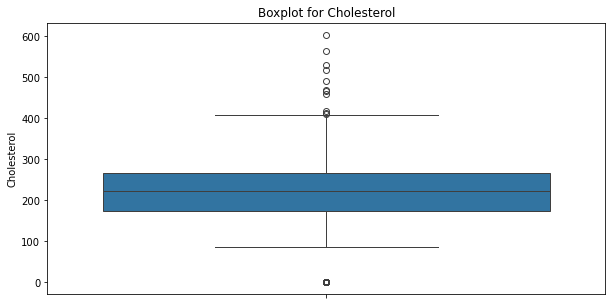

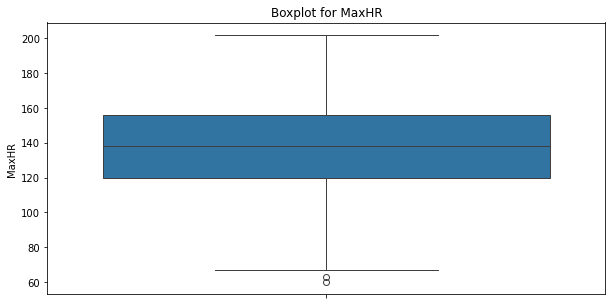

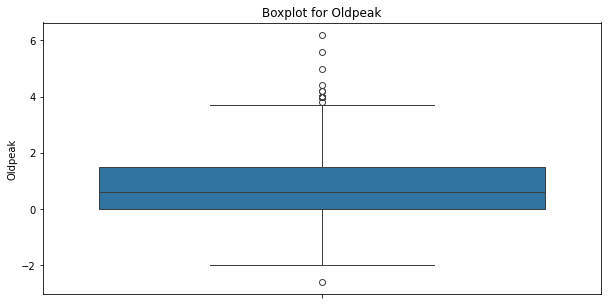

In [12]:
numerical_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
for column in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=heart_df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

_Note: There may be more cells than what you may need for viewing and reporting the entries properly and nicely._

In [13]:
# Potential viewing and reporting of outlier entries for Age
# Only look at the one extreme maximum outlier as other ages seem reasonable (0-100)
heart_df.iloc[heart_df["Age"].idxmax()]

Age                58.0
Sex                   M
ChestPainType       ASY
RestingBP         160.0
Cholesterol       256.0
FastingBS          True
RestingECG          LVH
MaxHR             113.0
ExerciseAngina     True
Oldpeak             1.0
ST_Slope             Up
HeartDisease       True
Name: 599, dtype: object

In [14]:
# Potential viewing and reporting of outlier entries for RestingBP
# Check the 5 highest outliers
high_5_rows = heart_df.nlargest(5,'RestingBP')
print(f"5 High Outliers:\n  {high_5_rows}")
# Only one low outlier
print(f"Lowest Outlier:\n  {heart_df.iloc[heart_df['RestingBP'].idxmin()]}")

5 High Outliers:
        Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
243  54.0   M           ASY      200.0        198.0      False     Normal   
368  64.0   F           ASY      200.0          0.0      False     Normal   
402  61.0   M           NAP      200.0          0.0       True         ST   
737  56.0   F           ASY      200.0        288.0       True        LVH   
764  54.0   M           ATA      192.0        283.0      False        LVH   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
243  142.0            True      2.0     Flat          True  
368  140.0            True      1.0     Flat          True  
402   70.0           False      0.0     Flat          True  
737  133.0            True      4.0     Down          True  
764  195.0           False      0.0       Up          True  
Lowest Outlier:
  Age                 53.0
Sex                    M
ChestPainType        ASY
RestingBP           80.0
Cholesterol          0.0
FastingBS

In [15]:
# Potential viewing and reporting of outlier entries for Cholersterol
# Check the 5 highest outliers
high_5_rows = heart_df.nlargest(5,'Cholesterol')
print(f"5 High Outliers:\n  {high_5_rows}")
# Check the 5 lowest outleirs
low_5_rows = heart_df.nsmallest(5,'Cholesterol')
print(f"5 Lowest Outliers:\n  {low_5_rows}")

5 High Outliers:
        Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
151  54.0   M           ASY      130.0        603.0       True     Normal   
621  67.0   F           NAP      115.0        564.0      False        LVH   
77   32.0   M           ASY      118.0        529.0      False     Normal   
31   53.0   M           NAP      145.0        518.0      False     Normal   
252  44.0   M           ASY      135.0        491.0      False     Normal   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
151  125.0            True      1.0     Flat          True  
621  160.0           False      1.6     Flat         False  
77   130.0           False      0.0     Flat          True  
31   130.0           False      0.0     Flat          True  
252  135.0           False      0.0     Flat          True  
5 Lowest Outliers:
        Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
295  65.0   M           ASY      115.0          0.0   

In [16]:
# Potential viewing and reporting of outlier entries for MaxHR
# No high outliers
# Check the 2 lowest outleirs
low_5_rows = heart_df.nsmallest(2,'MaxHR')
print(f"2 Lowest Outliers:\n  {low_5_rows}")

2 Lowest Outliers:
        Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
393  51.0   M           ASY      140.0          0.0      False     Normal   
373  60.0   M           ASY      135.0          0.0      False     Normal   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
393   60.0           False      0.0     Flat          True  
373   63.0            True      0.5       Up          True  


In [17]:
# Potential viewing and reporting of outlier entries for OldPeak
# Check the 5 highest outliers
high_5_rows = heart_df.nlargest(5,'Oldpeak')
print(f"5 High Outliers:\n  {high_5_rows}")
# Check the  lowest outliers
low_5_rows = heart_df.nsmallest(1,'Oldpeak')
print(f"5 Lowest Outliers:\n  {low_5_rows}")

5 High Outliers:
        Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
855  62.0   F           ASY      160.0        164.0      False        LVH   
776  55.0   M           ASY      140.0        217.0      False     Normal   
168  50.0   M           ASY      140.0        231.0      False         ST   
905  58.0   M           ASY      114.0        318.0      False         ST   
707  59.0   M            TA      178.0        270.0      False        LVH   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
855  145.0           False      6.2     Down          True  
776  111.0            True      5.6     Down          True  
168  140.0            True      5.0     Flat          True  
905  140.0           False      4.4     Down          True  
707  145.0           False      4.2     Down         False  
5 Lowest Outliers:
        Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
326  46.0   M           ASY      100.0          0.0   

iii. Decide and briefly reason which entries can be kept such that some values can be imputed later and which entries have to be deleted. Apply the preprocessing by either deleting entries or by replacing values that should be imputed by setting their value to NaN respectively. Report for both processings how many entries are effected.

__Student Answer:__ The Age outlier of 388 is defintily wrong and its row should be removed. The fact that none of us have any background in medicine lead us to the decision that we accept all values for the other columns for now. If some of these are not possible (e.g. the patient would alreay be dead with a cholesterol level of 603) the decision to remove them should be done only after consulting a domain expert (e.g. a doctor)

EDIT: At a later point, we now realized that based on our answer, subsection d) is not solvable. After checking RWTH moodle we saw that some people interpreted a cholesterol level of 0 as a missing value. In order to solve subtask d) we will do so as well. However, we still believe that our argument above holds. The assumption should generally not be made without input of a domain expert (especially concerning medical knowledge). 

In [18]:
# Potential removing of outliers, reporting their number, and showing of the resulting dataframe
#Show all rows that have a to high Age
too_old = heart_df["Age"] > 150
selected_rows = heart_df[too_old]
print(selected_rows)
heart_df = heart_df.drop(selected_rows.index)
heart_df.head()

       Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
597  388.0   M           ASY      160.0        256.0       True         ST   

     MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
597  136.0           False      0.2       Up         False  


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,False,Normal,172.0,False,0.0,Up,False
1,49.0,F,NAP,160.0,180.0,False,Normal,156.0,False,1.0,Flat,True
2,37.0,M,ATA,130.0,283.0,False,ST,98.0,False,0.0,Up,False
3,48.0,F,ASY,138.0,214.0,False,Normal,108.0,True,1.5,Flat,True
4,54.0,M,NAP,150.0,195.0,False,Normal,122.0,False,0.0,Up,False


In [19]:
# Potential replacing of values with NaN, reporting their number, and showing of the resulting dataframe
heart_df["Cholesterol"].replace(0.0, np.nan, inplace=True)
print(f"Number of Rows containing NaN values: {heart_df[heart_df.isna().any(axis=1)].shape[0]}")
heart_df.head()

Number of Rows containing NaN values: 172


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,False,Normal,172.0,False,0.0,Up,False
1,49.0,F,NAP,160.0,180.0,False,Normal,156.0,False,1.0,Flat,True
2,37.0,M,ATA,130.0,283.0,False,ST,98.0,False,0.0,Up,False
3,48.0,F,ASY,138.0,214.0,False,Normal,108.0,True,1.5,Flat,True
4,54.0,M,NAP,150.0,195.0,False,Normal,122.0,False,0.0,Up,False


iv. To give yourself a better insight, plot the resulting dataframe again using boxplots.

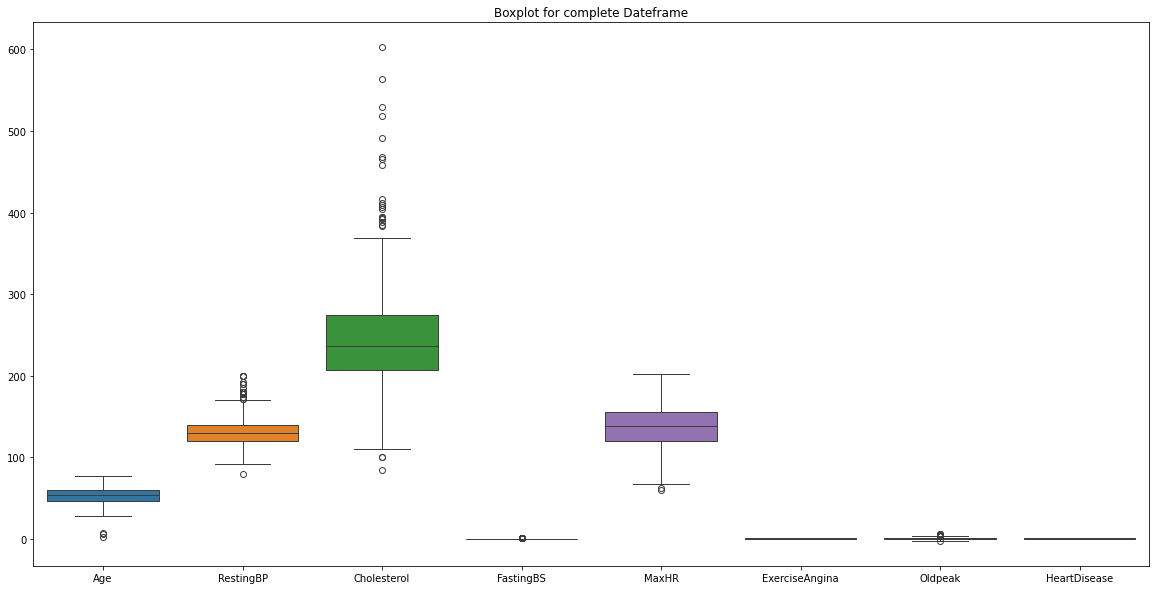

In [20]:
# Creating a boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(data=heart_df)
plt.title(f'Boxplot for complete Dateframe')
plt.show()

### d)
i. In this task, we want to impute missing values based on their k-nearest neighbor. Therefore, as a first step, create a reduced dataframe that contains the column(s) with missing values and with columns that correlate with the missing value. Give a brief reasoning and argue about the hypotheses made.

In [21]:
# Creating a dataframe with the values to be imputed and the correlating columns
# This assumes the changed task description and graphic from https://moodle.rwth-aachen.de/mod/forum/discuss.php?d=224702 
# with the comment: "von Rennert, Christian - Mittwoch, 3. Januar 2024, 17:02"
# Unfortunatly our notebook does not seem to include the changes at the time of working on them
# The graphic states that RestingBP and MaxHR correlate to Cholesterol 
selected_columns =  ["Cholesterol", "RestingBP", "MaxHR"]
reduced_df = heart_df[selected_columns]
reduced_df.head()

,Cholesterol,RestingBP,MaxHR
0,289.0,140.0,172.0
1,180.0,160.0,156.0
2,283.0,130.0,98.0
3,214.0,138.0,108.0
4,195.0,150.0,122.0


__Student Answer:__ Based on the new tsak description, the hyptheses (correlation if value >= 0.1) is determined by the task itself

ii. Next, use k-nearest neighbor imputation with $k = 5$. Impute the missing values. Update the dataframe `heart_df`.

In [22]:
# Applying k-nearest neighbor imputation
knn = KNNImputer(missing_values=np.nan, n_neighbors=5)
reduced_df = knn.fit_transform(heart_df[selected_columns])

In [23]:
# Updating the imputed column(s)
heart_df[selected_columns] = reduced_df
print(f"Number of Rows containing NaN values: {heart_df[heart_df.isna().any(axis=1)].shape[0]}")
heart_df.head()

Number of Rows containing NaN values: 0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,False,Normal,172.0,False,0.0,Up,False
1,49.0,F,NAP,160.0,180.0,False,Normal,156.0,False,1.0,Flat,True
2,37.0,M,ATA,130.0,283.0,False,ST,98.0,False,0.0,Up,False
3,48.0,F,ASY,138.0,214.0,False,Normal,108.0,True,1.5,Flat,True
4,54.0,M,NAP,150.0,195.0,False,Normal,122.0,False,0.0,Up,False


    plt.figure(figsize=(10, 5))
    sns.boxplot(data=heart_df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()### e)
In this task, we apply one-hot encoding for all categorical and all boolean features. This is used later for visualization. Afterwards, show the resulting dataframe.

In [40]:
# Replacing categorical and boolean features with one-hot encoded columns
from sklearn.preprocessing import OneHotEncoder
selected_columns = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

#Create encoder and perform fitting
encoder = OneHotEncoder(sparse=False)
cat_and_bool_encoded = encoder.fit_transform(heart_df[selected_columns])
cat_and_bool_encoded_df = pd.DataFrame(cat_and_bool_encoded, columns=encoder.get_feature_names_out(selected_columns))

#Reset index (due to deleted rows), concat both dfs and drop old columns 
new_heart_df = heart_df.reset_index(drop=True)
new_heart_df = pd.concat([new_heart_df, cat_and_bool_encoded_df], axis=1)
new_heart_df.drop(columns=selected_columns, axis=1, inplace=True)
new_heart_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_False,ExerciseAngina_True,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease_False,HeartDisease_True
0,40.0,140.0,289.0,172.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,49.0,160.0,180.0,156.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,37.0,130.0,283.0,98.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,48.0,138.0,214.0,108.0,1.5,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,54.0,150.0,195.0,122.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Part II: Advanced Visualization (8 pts)

In this question, we continue using the preprocessed data from Part I.

### a)
In this task, visualize the relation by plotting each pair of numerical features. Visualize the instances in the pairplots of those individuals that have and that do not have heart disease.

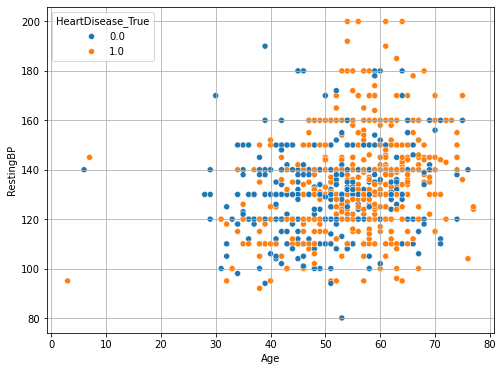

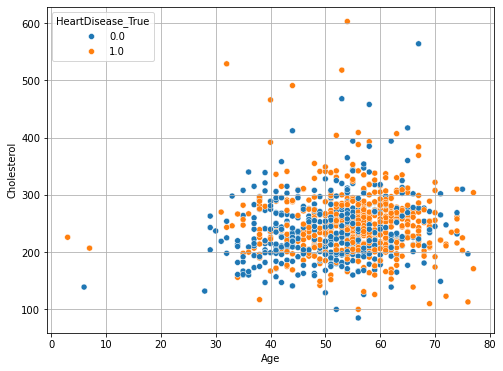

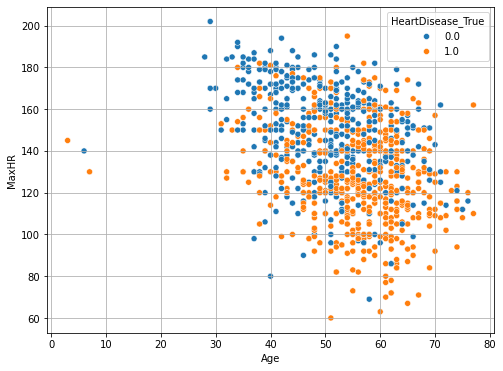

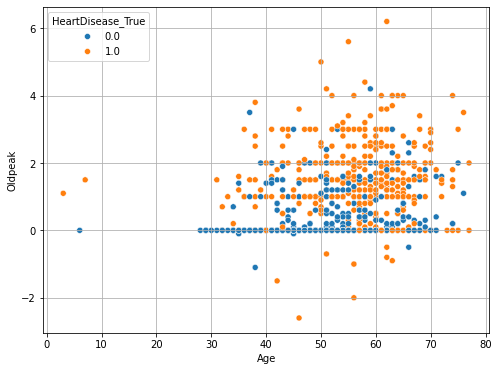

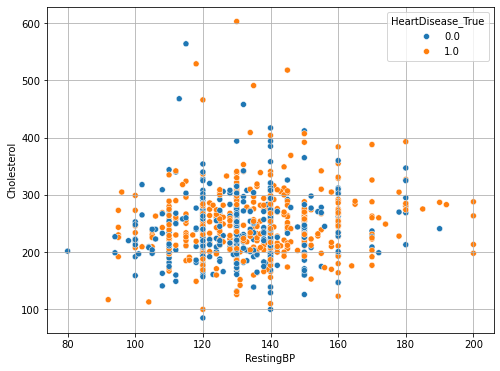

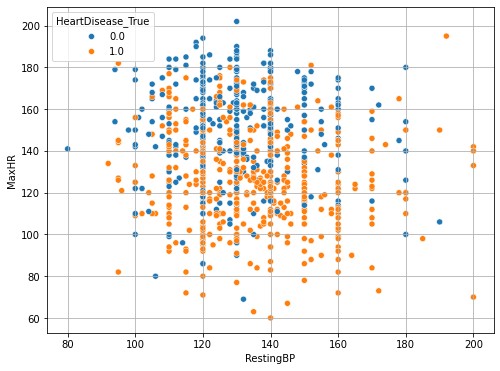

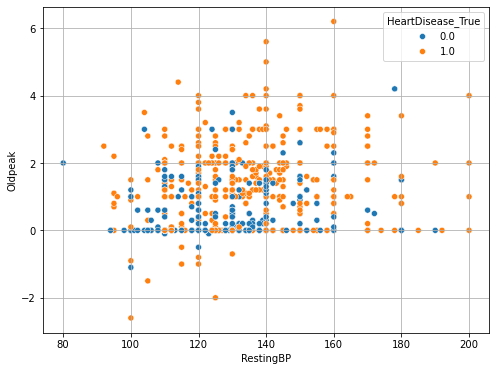

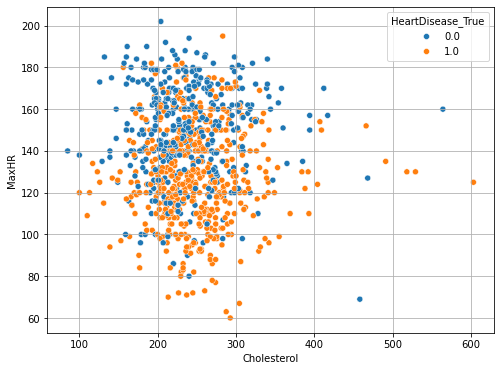

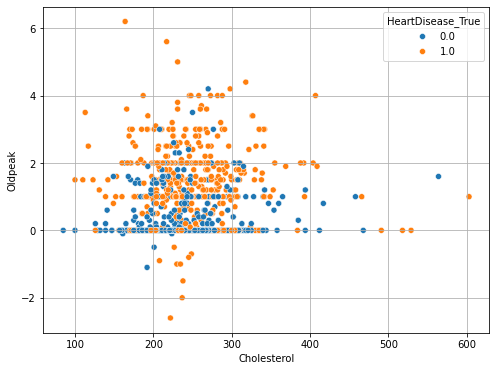

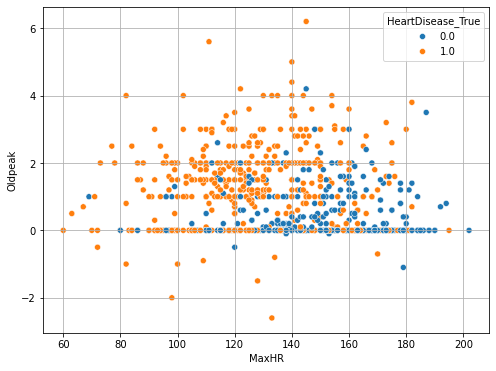

In [50]:
# Visualizing the relation between the numerical values using a pairplot, where the entries are classified by whether a heart disease is present  
# Age - RestingBP
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_heart_df['Age'], y=new_heart_df['RestingBP'], hue=new_heart_df['HeartDisease_True'])
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.grid(True)
plt.show()
# Age - Cholesterol
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_heart_df['Age'], y=new_heart_df['Cholesterol'], hue=new_heart_df['HeartDisease_True'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()
# Age - MaxHR
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_heart_df['Age'], y=new_heart_df['MaxHR'], hue=new_heart_df['HeartDisease_True'])
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.grid(True)
plt.show()
# Age - Oldpeak
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_heart_df['Age'], y=new_heart_df['Oldpeak'], hue=new_heart_df['HeartDisease_True'])
plt.xlabel('Age')
plt.ylabel('Oldpeak')
plt.grid(True)
plt.show()
# RestingBP - Cholesterol
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_heart_df['RestingBP'], y=new_heart_df['Cholesterol'], hue=new_heart_df['HeartDisease_True'])
plt.xlabel('RestingBP')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()
# RestingBP - MaxHR
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_heart_df['RestingBP'], y=new_heart_df['MaxHR'], hue=new_heart_df['HeartDisease_True'])
plt.xlabel('RestingBP')
plt.ylabel('MaxHR')
plt.grid(True)
plt.show()
# RestingBP - Oldpeak
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_heart_df['RestingBP'], y=new_heart_df['Oldpeak'], hue=new_heart_df['HeartDisease_True'])
plt.xlabel('RestingBP')
plt.ylabel('Oldpeak')
plt.grid(True)
plt.show()
# Cholesterol - MaxHR
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_heart_df['Cholesterol'], y=new_heart_df['MaxHR'], hue=new_heart_df['HeartDisease_True'])
plt.xlabel('Cholesterol')
plt.ylabel('MaxHR')
plt.grid(True)
plt.show()
# Cholesterol - Oldpeak
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_heart_df['Cholesterol'], y=new_heart_df['Oldpeak'], hue=new_heart_df['HeartDisease_True'])
plt.xlabel('Cholesterol')
plt.ylabel('Oldpeak')
plt.grid(True)
plt.show()
# MaxHR - Oldpeak
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_heart_df['MaxHR'], y=new_heart_df['Oldpeak'], hue=new_heart_df['HeartDisease_True'])
plt.xlabel('MaxHR')
plt.ylabel('Oldpeak')
plt.grid(True)
plt.show()


### b)
i. Having the pairplot, we are interested in more details on the relation between the age of a patient and maximum heart rate. Therefore, create plot that shows the regression line between both features.

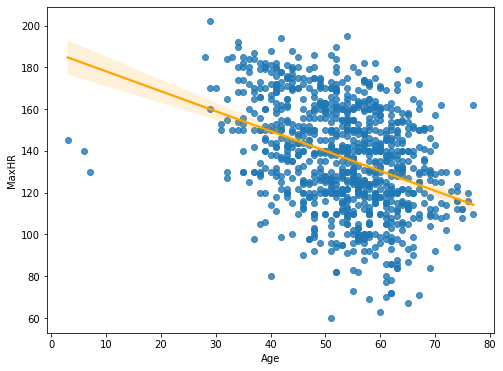

In [53]:
# Plotting age and maximum heart rate with regression line
plt.figure(figsize=(8, 6)) 
sns.regplot(x=new_heart_df["Age"], y=new_heart_df["MaxHR"], line_kws={"color": "orange"})
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.show()

ii. Given our evaluation from task b-i), we are not sure if Simpson's Paradox occurs or not. Give some short reasoning, and if needed, do some experiment to check whether Simpson's Paradox occurs.

In [68]:
# Potential code for Simpson's Paradox testing

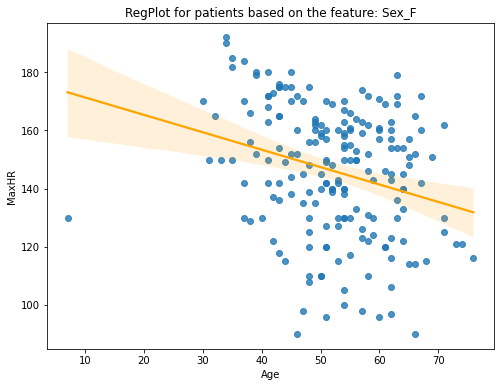

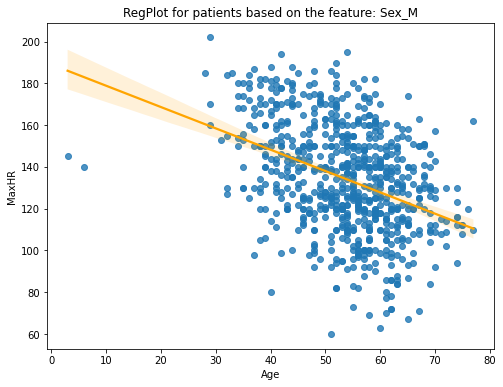

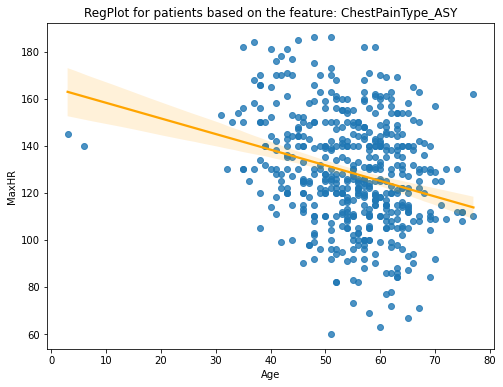

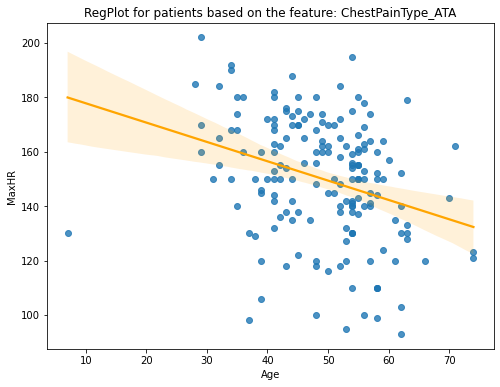

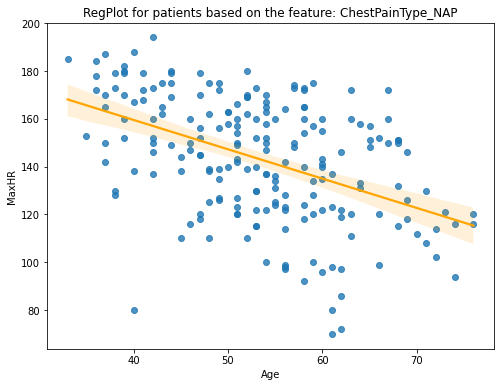

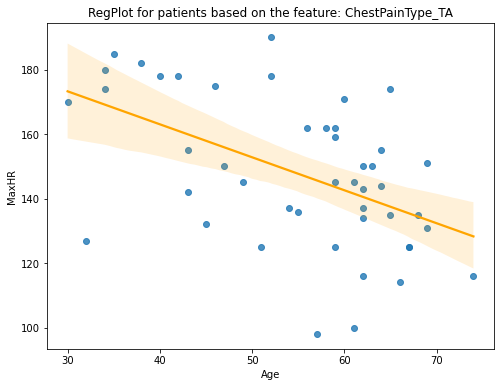

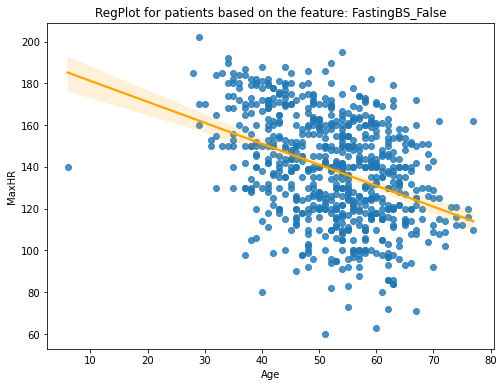

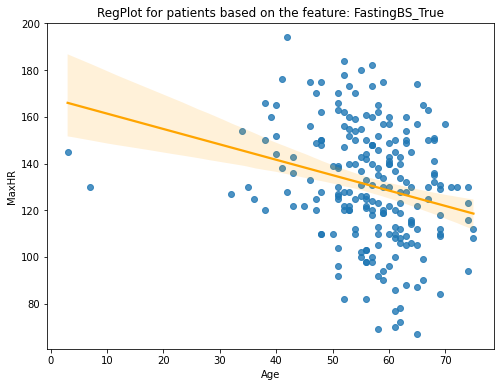

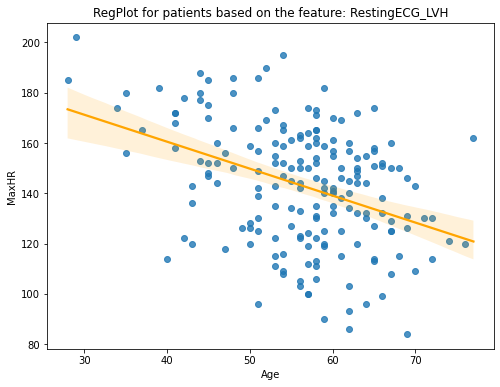

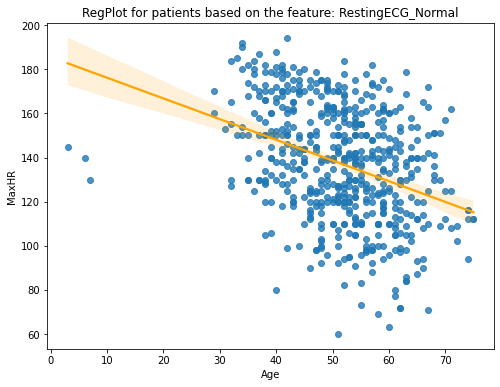

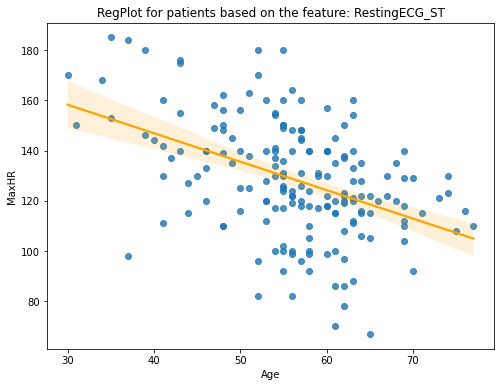

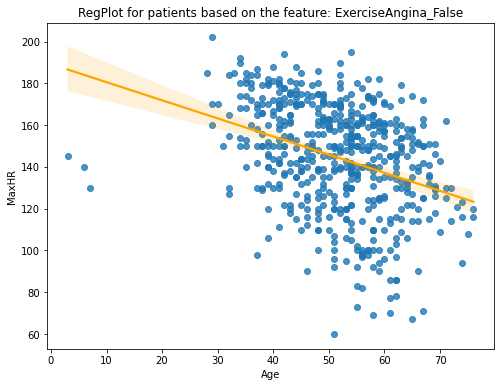

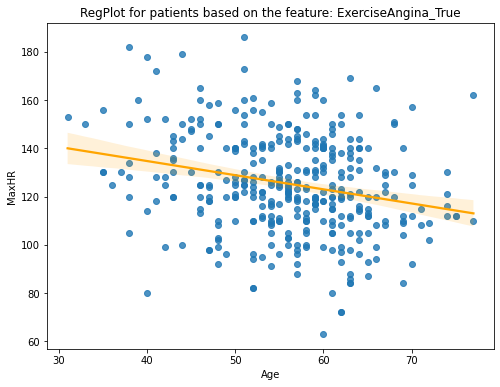

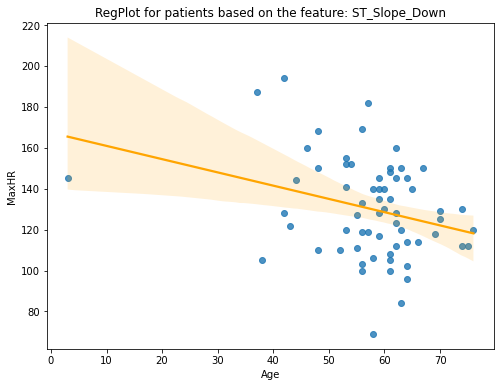

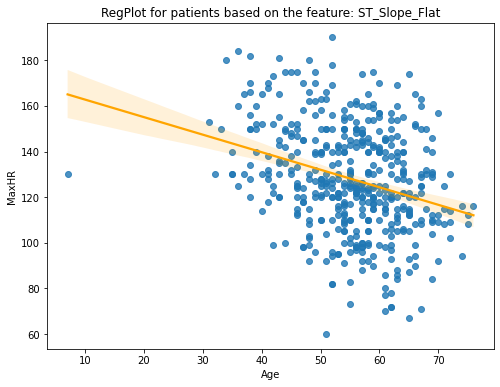

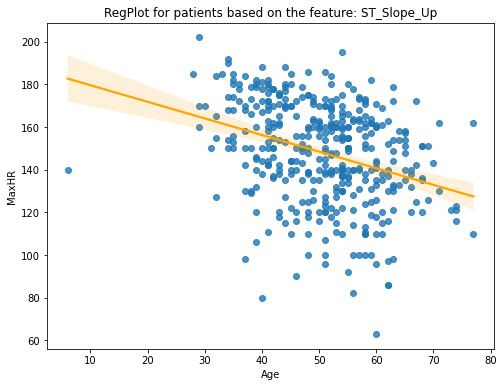

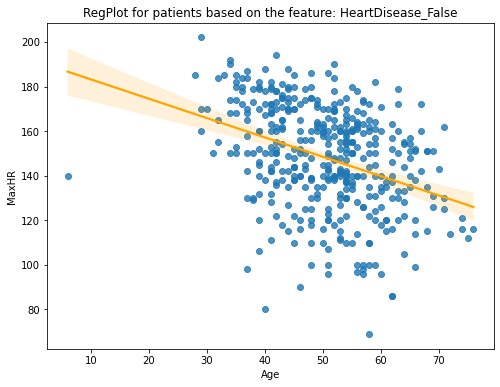

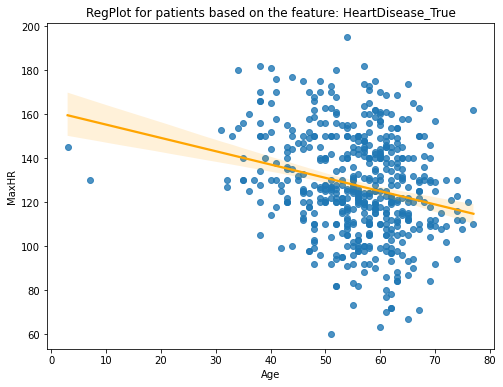

In [70]:
# Potential code for Simpson's Paradox testing
# Split the data for all possible encoded fatures 
encoded_features = encoder.get_feature_names_out(selected_columns)
for feature in encoded_features:
    df_encoded = new_heart_df[new_heart_df[feature] == 1.0]
    plt.figure(figsize=(8, 6)) 
    sns.regplot(x=df_encoded["Age"], y=df_encoded["MaxHR"],  line_kws={"color": "orange"})
    plt.xlabel("Age")
    plt.ylabel("MaxHR")
    plt.title(f"RegPlot for patients based on the feature: {feature}")
    plt.show()

__Student Answer:__ Our inital observation is that the maximum heartrate decreases with the Age of the patient. The results above show that even if we split the data based on all available categorical and boolean features, the MaxHR still decreases over age (therefore a split based on any combination of the features would show the same trend). We can therefore conclude, that based on the provided data, the Simpson's Paradox does not occurr.

### c)
In this task, we want to obtain a deeper understanding of the characteristics of each state of the former categorical or boolean features. Therefore, we create a heatmap that can be used to get a first impression of which value of which feature correlates with each other feature. 

i. Create a dataframe that contains as its columns the feature states and as its index all the column names of `heart_df`. Each entry is the sum of entries that have such a combination of features being true for the one-hot encoded features. For example, given the entries:
| ID | Feature1_True | Feature1_False | Feature2_StateA | Feature2_StateB | Feature2_StateC | Feature3_StateA | Feature3_StateB |
|----|---------------|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| 1  | True          | False          | True            | False           | False           | True            | False           |
| 2  | True          | False          | False           | True            | False           | True            | False           |
| 3  | False         | True           | False           | True            | False           | True            | False           |

In this example, we would obtain the following entries as a result:

|                 | Feature1_True | Feature1_False | Feature2_StateA | Feature2_StateB | Feature2_StateC | Feature3_StateA | Feature3_StateB |
|-----------------|---------------|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| Feature1_True   | 2             | 0              | 1               | 1               | 0               | 2               | 0               |
| Feature1_False  | 0             | 1              | 0               | 1               | 0               | 1               | 0               |
| Feature2_StateA | 1             | 0              | 1               | 0               | 0               | 1               | 0               |
| Feature2_StateB | 1             | 1              | 0               | 2               | 0               | 2               | 0               |
| Feature2_StateC | 0             | 0              | 0               | 0               | 0               | 0               | 0               |
| Feature3_StateA | 2             | 1              | 1               | 2               | 0               | 3               | 0               |
| Feature3_StateB | 0             | 0              | 0               | 0               | 0               | 0               | 0               |

In [71]:
encoded_features = encoder.get_feature_names_out(selected_columns)
print(encoded_features)

['Sex_F' 'Sex_M' 'ChestPainType_ASY' 'ChestPainType_ATA'
 'ChestPainType_NAP' 'ChestPainType_TA' 'FastingBS_False' 'FastingBS_True'
 'RestingECG_LVH' 'RestingECG_Normal' 'RestingECG_ST'
 'ExerciseAngina_False' 'ExerciseAngina_True' 'ST_Slope_Down'
 'ST_Slope_Flat' 'ST_Slope_Up' 'HeartDisease_False' 'HeartDisease_True']


In [72]:
# Creating the data for the heatmap.
encoded_features = encoder.get_feature_names_out(selected_columns)
new_df = pd.DataFrame(index=encoded_features, columns=encoded_features)
for x in encoded_features:
    for y in encoded_features:
        sum_together = ((new_heart_df[x] == 1) & (new_heart_df[y] == 1)).sum()
        new_df.at[x,y] = sum_together
new_df   

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_False,FastingBS_True,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_False,ExerciseAngina_True,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease_False,HeartDisease_True
Sex_F,194,0,70,61,53,10,167,27,47,119,28,151,43,7,76,111,143,51
Sex_M,0,726,428,113,149,36,537,189,141,435,150,398,328,57,384,285,268,458
ChestPainType_ASY,70,428,498,0,0,0,356,142,102,286,110,201,297,47,318,133,105,393
ChestPainType_ATA,61,113,0,174,0,0,154,20,23,124,27,157,17,3,33,138,149,25
ChestPainType_NAP,53,149,0,0,202,0,161,41,47,122,33,151,51,10,87,105,131,71
ChestPainType_TA,10,36,0,0,0,46,33,13,16,22,8,40,6,4,22,20,26,20
FastingBS_False,167,537,356,154,161,33,704,0,146,441,117,431,273,38,331,335,367,337
FastingBS_True,27,189,142,20,41,13,0,216,42,113,61,118,98,26,129,61,44,172
RestingECG_LVH,47,141,102,23,47,16,146,42,188,0,0,115,73,17,97,74,82,106
RestingECG_Normal,119,435,286,124,122,22,441,113,0,554,0,347,207,32,266,256,268,286


ii. Next, create the heatmap based on the data from the last subtask. If necessary, improve readability of the visualization.

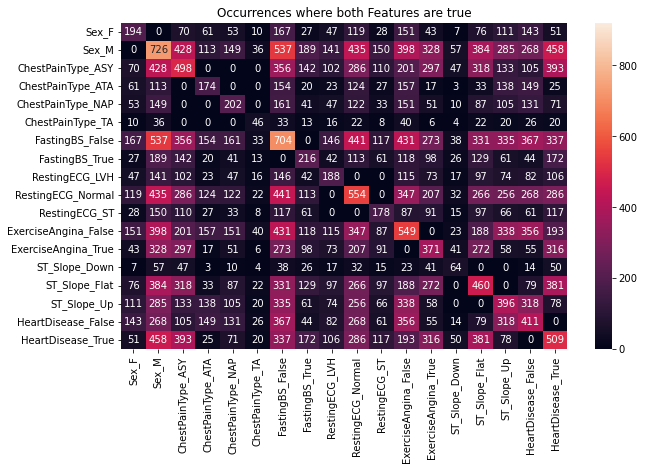

In [81]:
# Visualizing the obtained heatmap
new_df = new_df.fillna(0)
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.heatmap(new_df, vmin=0, vmax=920, annot=True, fmt='d')
plt.title('Occurrences where both Features are true')
plt.show()

Given the heatmap, briefly derive some insights towards the different values of a feature. I.e., you may choose a heart disease being present or not and argue about what correlates for the other features for each value.

__Student Answer:__ 